# **Hackmageddon.**
El CSV se centra en incidentes de ciberseguridad, específicamente en ataques de secuestro de cuentas.

## Importación de librerias.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## Importación e información del DataFrame.

In [55]:
df = pd.read_csv('data/HACKMAGEDDON.csv')
df

,Date Reported,Date Occurred,Date Discovered,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link,Tags
0,2020-01-02 00:00:00,NaN,NaN,Chuckling Squad,Adam Sandler's Twitter account,Adam Sandler's Twitter account is hacked and u...,Account Hijacking,R Arts entertainment and recreation,CC,US,https://www.forbes.com/sites/daveywinder/2020/...,"Adam Sandler, Twitter, Mariah Carey, President..."
1,2020-01-02 00:00:00,NaN,NaN,?,Klamath County Veterans Service Office,Klamath County Veterans Service Office notifie...,Account Hijacking,"O Public administration and defence, compulsor...",CC,US,https://www.databreaches.net/or-klamath-county...,Klamath County Veterans Service Office
2,2020-01-03 00:00:00,NaN,NaN,?,Alomere Health,"The personal and medical information of 49,351...",Account Hijacking,Q Human health and social work activities,CC,US,https://www.bleepingcomputer.com/news/security...,Alomere Health
3,2020-01-03 00:00:00,NaN,NaN,?,Contra Costa County Library System,The Contra Costa County Library System is hit ...,Malware,"O Public administration and defence, compulsor...",CC,US,https://www.govtech.com/security/Bay-Area-Libr...,"The Contra Costa County Library System, ransom..."
4,2020-01-03 00:00:00,NaN,NaN,?,Native American Rehabilitation Association,Native American Rehabilitation Association ann...,Malware,Q Human health and social work activities,CC,US,https://www.databreaches.net/native-american-r...,"Native American Rehabilitation Association, Em..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4957,2022-01-12 00:00:00,Since 26/10/2021,-,?,Multiple Organizations,Researchers from Cisco Talos discover a new ca...,Malware,Multiple Industries,CC,>1,https://www.zdnet.com/article/remote-access-tr...,"Cisco Talos, Nanocore, Netwire, AsyncRAT"
4958,2022-01-12 00:00:00,During January 2021,During January 2021,?,OneDigital,"OneDigital, an insurance broker, discloses a r...",Malware,"Professional, scientific and technical",CC,US,https://www.hipaajournal.com/phi-of-anthem-mem...,"OneDigital, ransomware"
4959,2022-01-13 00:00:00,During November 2021,During November 2021,BlueNoroff,Cryptocurrency startups,Researchers from Kaspersky discover SnatchCryp...,Malware,Fintech,CC,>1,https://www.bleepingcomputer.com/news/security...,"Kaspersky, 'BlueNoroff', MetaMask, SnatchCrypto"
4960,2022-01-13 00:00:00,Since December 2021,During December 2021,Multiple threat actors,Office 365 users,Researchers from Avanan discover multiple camp...,Account Takeover,Multiple Industries,CC,>1,https://www.helpnetsecurity.com/2022/01/13/phi...,"Avanan, Adobe Creative Cloud"


In [56]:
df.describe()

,Date Reported,Date Occurred,Date Discovered,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link,Tags
count,4962,2614,2613,4942,4947,4948,4947,4948,4871,4773,4932,4703
unique,725,841,513,844,3864,4861,74,43,6,154,4534,4542
top,2021-03-10 00:00:00,-,-,?,Multiple targets,A threat actor sells account databases contain...,Malware,Multiple Industries,CC,US,https://www.bleepingcomputer.com/news/security...,"University of York, Oxford Brookes University,..."
freq,24,1021,1393,3342,307,16,1963,541,4207,1749,16,11


In [57]:
df.shape

(4962, 12)

In [58]:
df.dtypes

Date Reported      object
Date Occurred      object
Date Discovered    object
Author             object
Target             object
Description        object
Attack             object
Target Class       object
Attack Class       object
Country            object
Link               object
Tags               object
dtype: object

In [59]:
df.columns

Index(['Date Reported', 'Date Occurred', 'Date Discovered', 'Author', 'Target',
       'Description', 'Attack', 'Target Class', 'Attack Class', 'Country',
       'Link', 'Tags'],
      dtype='object')

Se nos muestra que tiene un total de 12 columnas que deberemos de examinar para saber cuáles tener en cuenta a la hora de la realización de nuestro estudio y lo q significan cada una de ellas.
- **Date Reported**: La fecha en que el incidente fue reportado por primera vez a la organización o autoridad competente. Puede diferir de la fecha en que ocurrió el ataque.   
- **Date Occurred**: La fecha en que ocurrió el incidente o ataque. En algunos casos, puede ser desconocida si el ataque no fue detectado inmediatamente.     
- **Date Discovered**: La fecha en que se descubrió el incidente. Esta fecha puede ser posterior a la fecha en que ocurrió el evento, especialmente si el ataque pasó desapercibido durante un tiempo.    
- **Author**: La entidad o persona que reportó o documentó el incidente. Puede ser un investigador, analista de seguridad o un sistema automatizado de detección            
- **Target**: La entidad o sistema que fue el objetivo del ataque. Puede ser una empresa, un gobierno, un servidor específico, o una persona            
- **Description**: Una descripción detallada del incidente o ataque. Aquí se proporcionan detalles técnicos o generales sobre lo sucedido.       
- **Attack**: El tipo de ataque llevado a cabo, por ejemplo, "phishing", "ransomware", "ataque de denegación de servicio (DoS)", etc.             
- **Target Class**: La clase o tipo de objetivo del ataque. Puede referirse a categorías como "infraestructura crítica", "empresa privada", "usuario final", entre otros.       
- **Attack Class**: Clasificación del ataque según su naturaleza. Por ejemplo, "intrusión", "exfiltración de datos", "interrupción de servicio", etc.      
- **Country**: El país de origen del ataque, o donde se encuentra el objetivo del ataque.            
- **Link**: Un enlace (URL) a una fuente externa que proporciona más información sobre el incidente o ataque.               
- **Tags**: Etiquetas que ayudan a clasificar el incidente, a menudo utilizadas para categorizar o identificar temas comunes en los datos, como "malware", "APT (Advanced Persistent Threat)", "fraude financiero", etc.               

### **Date Reported.**

Transformaremos la columna **Date Reported** en tres nuevas columnas que representarán el día, mes y año por separado. Esto permitirá realizar un análisis más detallado de los datos basados en fechas específicas.

In [60]:
df['Date Reported'] = pd.to_datetime(df['Date Reported'])

df['Day'] = df['Date Reported'].dt.day
df['Month'] = df['Date Reported'].dt.month
df['Year'] = df['Date Reported'].dt.year

In [61]:
df.drop(columns=['Date Reported'], inplace=True)
df.head()

,Date Occurred,Date Discovered,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link,Tags,Day,Month,Year
0,NaN,NaN,Chuckling Squad,Adam Sandler's Twitter account,Adam Sandler's Twitter account is hacked and u...,Account Hijacking,R Arts entertainment and recreation,CC,US,https://www.forbes.com/sites/daveywinder/2020/...,"Adam Sandler, Twitter, Mariah Carey, President...",2,1,2020
1,NaN,NaN,?,Klamath County Veterans Service Office,Klamath County Veterans Service Office notifie...,Account Hijacking,"O Public administration and defence, compulsor...",CC,US,https://www.databreaches.net/or-klamath-county...,Klamath County Veterans Service Office,2,1,2020
2,NaN,NaN,?,Alomere Health,"The personal and medical information of 49,351...",Account Hijacking,Q Human health and social work activities,CC,US,https://www.bleepingcomputer.com/news/security...,Alomere Health,3,1,2020
3,NaN,NaN,?,Contra Costa County Library System,The Contra Costa County Library System is hit ...,Malware,"O Public administration and defence, compulsor...",CC,US,https://www.govtech.com/security/Bay-Area-Libr...,"The Contra Costa County Library System, ransom...",3,1,2020
4,NaN,NaN,?,Native American Rehabilitation Association,Native American Rehabilitation Association ann...,Malware,Q Human health and social work activities,CC,US,https://www.databreaches.net/native-american-r...,"Native American Rehabilitation Association, Em...",3,1,2020


### **Link**.
Esta columna será útil para definir las relaciones entre diferentes CSVs. Extraeremos el nombre del dominio de la URL para simplificar el análisis y la comparación entre los datos.

In [62]:
def obtener_dominio(url):
    try:
        return urlparse(url).netloc
    except:
        return None

df['Link'] = df['Link'].apply(obtener_dominio)
df['Link'] = df['Link'].str.replace('www.', '', regex=False)


## Limpieza de datos.

### Manejo de filas duplicadas.
En caso de haber filas duplicadas, deberemos de eliminar estas para que no afecten al análisis posterior.

In [63]:
df.duplicated().sum() # Columnas duplicadas

2

In [64]:
df[df.duplicated()]

,Date Occurred,Date Discovered,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link,Tags,Day,Month,Year
1656,NaN,NaN,?,Undisclosed North American hospitality merchant,Visa reveals that two North American hospitali...,Malware,K Financial and insurance activities,CC,US,zdnet.com,Visa,30,9,2020
2902,-,-,Revil AKA Sodinokibi,Unnamed Law Firm,Researchers from eSentire reveal the details o...,Malware,"Professional, scientific and technical",CC,US,threatpost.com,"REvil, Sodinokibi, eSentire",12,3,2021


In [65]:
df.drop_duplicates(inplace = True)

In [66]:
df.shape

(4960, 14)

### Manejo de valores nulos.

In [67]:
df.isnull().sum()

Date Occurred      2347
Date Discovered    2348
Author               20
Target               15
Description          14
Attack               15
Target Class         14
Attack Class         91
Country             189
Link                 30
Tags                259
Day                   0
Month                 0
Year                  0
dtype: int64

Se decidió eliminar las columnas **Date Ocurred** y **Date Discovered** debido a la alta proporción de valores `NaN`, que supera el 50%. Esta columna no aportaba información significativa para el análisis y su presencia podría afectar la calidad y el rendimiento del modelo. Mantener columnas con muchos valores nulos complicaría el preprocesamiento de datos y no contribuiría al aprendizaje del modelo.

In [68]:
df.drop(['Date Occurred', 'Date Discovered'], axis=1, inplace=True)

Las demás columnas con valores nulos representan menos del 20% del total de filas del DataFrame. Por lo tanto, lo más conveniente será eliminar estas filas en lugar de rellenarlas con valores como la mediana o la moda.

In [69]:
df.shape

(4960, 12)

In [70]:
df.dropna(inplace=True)
df.shape

(4477, 12)

Finalmente, tendríamos nuestro dataframe lleno, sin valores duplicados y nulos.

### Selección de variables categóricas y continuas.
Para realizar correctamente un ánalisis de datos debemos de distinguir entre las variables categóricas, variables que representan diferentes categorías o grupos.

In [71]:
df.nunique()

Author           784
Target          3530
Description     4423
Attack            67
Target Class      43
Attack Class       6
Country          150
Link             267
Tags            4339
Day               31
Month             12
Year               3
dtype: int64

In [72]:
v_continuas = []
v_categoricas = []
for i in df.columns:
    if df[i].nunique() > 200 or df[i].dtypes in ['float64', 'int64']:
        v_continuas.append(i)
    else:
        v_categoricas.append(i)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: Author, Target, Description, Link, Tags, Day, Month, Year
Variables categóricas: Attack, Target Class, Attack Class, Country


#### Tratamiento de variables categóricas.
Para el posterior modelo de clasificación, necesitamos codificar nuestras variables. Para ello, realizaremos una codificación ordinal que consiste en asignar valores enteros a las categorias basándose en su posición o jerarquía en los datos.

In [73]:
df[v_categoricas].head(3)

,Attack,Target Class,Attack Class,Country
0,Account Hijacking,R Arts entertainment and recreation,CC,US
1,Account Hijacking,"O Public administration and defence, compulsor...",CC,US
2,Account Hijacking,Q Human health and social work activities,CC,US


In [74]:
df[v_categoricas].nunique()

Attack           67
Target Class     43
Attack Class      6
Country         150
dtype: int64

In [75]:
df[v_categoricas].describe()

,Attack,Target Class,Attack Class,Country
count,4477,4477,4477,4477
unique,67,43,6,150
top,Malware,Multiple Industries,CC,US
freq,1821,517,3882,1665


**Análisis de Datos Categóricos de Ciberataques.**

- **Dominancia de CC y Malware**: La clase de ataque más frecuente es **CC**, lo que sugiere que este tipo de ataque es el más común. Además, **Malware/Malicious Software** es el grupo de ataque más prevalente, lo que indica una tendencia a utilizar software malicioso para ejecutar ataques.

- **Predominancia de USA**: La mayoría de los ataques se registran en **USA**, lo que puede indicar que esta región es un blanco preferido para los ciberataques.

Este análisis proporciona una visión general de los datos categóricos sobre ciberataques y ayuda a identificar patrones y tendencias que pueden ser cruciales para mejorar las medidas de seguridad.

##### **Attack.**

In [76]:
df['Attack'].unique()

array(['Account Hijacking', 'Malware', 'Targeted attack', 'Defacement',
       'Unknown', 'Malicious Script Injection', 'Vulnerability',
       'Password-spraying', 'Business Email Compromise',
       'Search Engine Poisoning', 'Malicious Spam', 'Misconfiguration',
       'DDoS', 'Malvertising', '>1', 'DNS hijacking', 'Domain Spoofing',
       'API Exploit', 'SQL Injection', 'Malicious Browser Extension',
       'Targeted Attack', 'Malicious Wordpress Plugin',
       'Fake Social Network accounts/groups/pages', 'Credential Stuffing',
       'Server-Side Ad Insertion (SSAI) Hijacking', 'DNS Hijacking',
       'Zoom bombing', 'Zoom Bombing', 'Web Shells',
       'Credential stuffing', 'Brute-force',
       'Malicious browser extension', 'Brute-Force', 'Wiretapping',
       'Bitcoin vanity addresses', 'Jackpotting', 'ATM "Black Box"',
       'OAuth token hijacking', 'Malicious SEO redirection',
       'Evil cursor', 'SSL Stripping', 'Malicious spam',
       'Account hijacking', 'Fake soci

In [77]:
df['Attack'] = df['Attack'].apply(lambda x: 'Malware' if x.startswith('Malicious') else x)

In [78]:
attack_types = {
    'Account Hijacking': ['Account Hijacking', 'Account Takeover', 'Account hijacking',
                          'Credential Stuffing', 'Password-spraying', 'Credential stuffing',
                          'Password-Spraying/Credential Stuffing', 'Brute-Force'
                        ],
    'Phishing': ['Fake Social Network accounts/groups/pages', 'Fake Social Accounts', 'Fake Websites', 
                 'Fake job listings', 'OAuth token hijacking', 'Fake social Network accounts/groups/pages'
                 ],
    'Denial of Service': ['DDoS', 'Server-Side Ad Insertion (SSAI) Hijacking', 'Zoom bombing', 
                          'Zoom Bombing'],
    'Vulnerability Exploitation': ['Vulnerability', 'SQL Injection', 'API Exploit', 'Brute-force', 
                                   'Evil cursor', 'SQLi','SSL Stripping', 'Compromised certificate',
                                   'Watering Hole'],
    'Data Breaches': ['Data-Scraping'],
    'Malvertising': ['Malvertising', 'Malicious Google search ads'],
    'Social Engineering': ['Business Email Compromise', 'Crypto Scam', 'Crypto scam'],
    'Targeted Attack': ['Targeted attack', 'Targeted Attack'],
    'Defacement': ['Defacement'],
    'Search Engine Poisoning': ['Search Engine Poisoning'],
    'Misconfiguration': ['Misconfiguration'],
    'DNS Hijacking': ['DNS hijacking', 'DNS Hijacking'],
    'Domain Spoofing': ['Domain Spoofing'],
    'Jackpotting': ['Jackpotting'],
    'ATM Black Box': ['ATM "Black Box"'],
    'Wiretapping': ['Wiretapping'],
    'Bitcoin Vanity Addresses': ['Bitcoin vanity addresses'],
    'Wind River Systems': ['Wind River Systems'],
    'SIM Swap': ['SIM swap'],
    'Deepfake': ['Deepfake'],
    'HTML Smuggling': ['HTML smuggling'],
    'PetitPotam NTLM Relay': ['PetitPotam NTLM Relay '],
    'Reentrancy Attack': ['Reentrancy attack'],
    'Malware': ['Malware', 'Web Shells', 'Windows Bit locker'],
    'Unknown': ['Unknown'], # desconocido
    '>1': ['>1'] # cuando hay más de uno
}


In [79]:
def categorize_attack(attack):
    for category, attacks in attack_types.items():
        if attack in attacks:
            return category
    return None

In [80]:
df['Attack'] = df['Attack'].apply(categorize_attack)

In [81]:
encoder = OrdinalEncoder()
df['Attack'] = encoder.fit_transform(df[['Attack Class']])
df.head(2)

,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link,Tags,Day,Month,Year
0,Chuckling Squad,Adam Sandler's Twitter account,Adam Sandler's Twitter account is hacked and u...,1.0,R Arts entertainment and recreation,CC,US,forbes.com,"Adam Sandler, Twitter, Mariah Carey, President...",2,1,2020
1,?,Klamath County Veterans Service Office,Klamath County Veterans Service Office notifie...,1.0,"O Public administration and defence, compulsor...",CC,US,databreaches.net,Klamath County Veterans Service Office,2,1,2020


##### **Attack Class.**
Debemos revisar los valores únicos en la columna para poder codificarlos adecuadamente. Sin embargo, observamos que hay una categoría que indica más de un tipo de ataque, representada como `'>1'` y `‘CC/CE’`. Por ello, es importante verificar cuántas filas contienen estos valores. Si el número de filas con estos valores es significativo, consideraremos crear columnas adicionales que representen cada tipo de ataque con un 1 o 0, indicando su presencia. En caso contrario, si no hay muchas filas, simplemente eliminaremos estos registros.

In [82]:
df['Attack Class'].unique()

array(['CC', 'CE', 'CW', 'H', '>1', 'CC/CE'], dtype=object)

In [83]:
for i in ['CC/CE', '>1']:
    print('Para la clase {} tenemos {} registros'.format(i, df[df['Attack Class'] == i].shape[0]))

Para la clase CC/CE tenemos 2 registros
Para la clase >1 tenemos 4 registros


In [84]:
index_to_drop = df[df['Attack Class'].isin(['CC/CE', '>1'])].index
df.drop(index=index_to_drop, inplace=True)

In [85]:
encoder = OrdinalEncoder()
df['Attack Class'] = encoder.fit_transform(df[['Attack Class']])
df.head(2)

,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link,Tags,Day,Month,Year
0,Chuckling Squad,Adam Sandler's Twitter account,Adam Sandler's Twitter account is hacked and u...,1.0,R Arts entertainment and recreation,0.0,US,forbes.com,"Adam Sandler, Twitter, Mariah Carey, President...",2,1,2020
1,?,Klamath County Veterans Service Office,Klamath County Veterans Service Office notifie...,1.0,"O Public administration and defence, compulsor...",0.0,US,databreaches.net,Klamath County Veterans Service Office,2,1,2020


##### **Target Class.**
Para agrupar las categorías en la columna **Target Class**, podemos crear un nuevo diccionario que asocie cada categoría original a un grupo más general. Esto ayudará a simplificar el análisis y facilitar el uso de técnicas de aprendizaje automático.

In [86]:
df['Target Class'].unique()

array(['R Arts entertainment and recreation',
       'O Public administration and defence, compulsory social security',
       'Q Human health and social work activities',
       'K Financial and insurance activities', 'Y Multiple Industries',
       'C Manufacturing', 'G Wholesale and retail trade', 'X Individual',
       'P Education', 'V Fintech',
       'D Electricity gas steam and air conditioning supply',
       'H Transportation and storage', 'J Information and communication',
       'M Professional scientific and technical activities',
       'U Activities of extraterritorial organizations and bodies',
       'E Water supply, sewerage waste management, and remediation activities',
       'S Other service activities',
       'I Accommodation and food service activities',
       'N Administrative and support service activities',
       'L Real estate activities', 'Z Unknown',
       'Administration and support service', 'Multiple Industries',
       'Finance and Insurance', 'Indi

In [87]:
target_class_mapping = {
    'Financial Services': ['Finance', 'Fintech', 'Financial and insurance activities','K Financial and insurance activities','V Fintech','Finance and Insurance','Finance and insurance'],
    'Healthcare/Social Services': ['Human health and social work', 'Health', 'Social', 'Social security','Q Human health and social work activities'],
    'Public Sector/Government': ['Extraterritorial organizations and bodies','U Activities of extraterritorial organizations and bodies','Public admin and defence', 'Public administration and defence', 'Government','O Public administration and defence, compulsory social security','N Administrative and support service activities','Public admin and defence, social security'],
    'Education': ['Education','P Education'],
    'Manufacturing/Energy': ['Manufacturing', 'Electricity', 'Electricity gas steam and air conditioning supply','C Manufacturing','D Electricity gas steam and air conditioning supply','Electricity, gas steam, air conditioning'],
    'Information/Communication': ['M Professional scientific and technical activities','J Information and communication','Information', 'Communication', 'Information and communication'],
    'Arts/Entertainment': ['Arts entertainment, recreation','Arts entertainment', 'Entertainment', 'Recreation','R Arts entertainment and recreation'],
    'Individuals': ['Individual'],
    'Multiple Industries': ['Multiple Industries', 'Y Multiple Industries', 'X Individual', 'Multiple targets'],
    'Retail Trade': ['Wholesale and retail trade', 'Wholesale and retail','G Wholesale and retail trade'],
    'Transportation': ['H Transportation and storage','Transportation and storage', 'Transport'],
    'Professional Services': ['Administration and support service','M Professional scientific and technical activities', 'Professional, scientific and technical'],
    'Environmental Services': ['E Water supply, sewerage waste management, and remediation activities', 'Water supply, waste mgmt, remediation'],
    'Accommodation and Food Services': ['I Accommodation and food service activities','Accommodation and food service', 'Accommodation and food service activities'],
    'Real Estate': ['L Real estate activities', 'Real estate'],
    'Other': ['Other service activities', 'S Other service activities', 'Unknown', 'Z Unknown']
}


Esta agrupación ofrece múltiples beneficios. Primero, simplifica el análisis al reducir el número de categorías, lo que facilita la interpretación y el manejo de los datos. Además, mejora la eficiencia de los modelos, ya que menos categorías pueden resultar en un mejor rendimiento en el aprendizaje automático. También facilita las visualizaciones, permitiendo crear gráficos más claros y comprensibles, lo que mejora la comunicación de los resultados. 

La agrupación contribuye a la reducción del ruido al eliminar categorías poco relevantes, lo que mejora la calidad del análisis y facilita la identificación de tendencias significativas. Asimismo, ayuda en la toma de decisiones al proporcionar un análisis más claro y simplificado, lo que permite a los responsables tomar decisiones informadas basadas en datos. Finalmente, esta agrupación prepara el camino para el aprendizaje supervisado, optimizando el proceso de modelado.




In [88]:
def assign_target(Target_Class):
    for continent, countries in target_class_mapping.items():
        if Target_Class in countries:
            return continent
    return None  # Si el país no está en la lista, retornar None

In [89]:
'''df['Target Class'] = df['Target Class'].map(assign_target)'''

"df['Target Class'] = df['Target Class'].map(assign_target)"

In [90]:
encoder = OrdinalEncoder()
df['Target Class'] = encoder.fit_transform(df[['Target Class']])
df.head(2)

,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link,Tags,Day,Month,Year
0,Chuckling Squad,Adam Sandler's Twitter account,Adam Sandler's Twitter account is hacked and u...,1.0,31.0,0.0,US,forbes.com,"Adam Sandler, Twitter, Mariah Carey, President...",2,1,2020
1,?,Klamath County Veterans Service Office,Klamath County Veterans Service Office notifie...,1.0,25.0,0.0,US,databreaches.net,Klamath County Veterans Service Office,2,1,2020


##### **Countries.**
Para realizar una evaluación más efectiva de los países en nuestros datos, es conveniente agruparlos por continentes. Esto es especialmente relevante porque en otros archivos CSV hay registros de ataques provenientes de diferentes países, distribuidos en distintos continentes.

Para facilitar este análisis, procederemos a crear seis nuevas columnas en nuestro conjunto de datos, cada una representando un continente específico. Estas columnas indicarán con un valor de 1 si el país pertenece al continente correspondiente y 0 si no es así, es decir, mediante una asignación de valores binarios.

In [91]:
df['Country'].unique()

array(['US', 'AT', 'SL', '>1', 'DE', 'KR', 'BH', 'CA', 'AU', 'UA', 'KW',
       'US\r\n CA\r\n MX', 'CZ', 'GR', 'TR', 'OM', 'JP', 'EU', 'MT', 'IT',
       'UK', 'NL', 'FR', 'HK', 'BR', 'IN', 'MY', 'US\r\n UK', 'IR', 'PR',
       'ZA', 'PS', 'US\r\n CA', 'ES', 'HR', 'IL', 'DK', 'RU', 'RW', 'CH',
       'PK', 'MX', 'PT', 'NZ', 'SG', 'US\r\n HK', 'SC', 'RS', 'LB',
       'SA\r\n AE', 'CN', 'MA', 'VN', 'MN', 'AM', 'JM', 'ES\r\n PT', 'LY',
       'INT', 'GE', 'IE', 'SA', 'CW', 'LK', 'CA\r\n JP', 'SY', 'NP', 'AZ',
       'US\r\n AU', 'PE', 'IL\r\n UK', 'US\r\n KR', 'EE', 'DE\r\n NL',
       'PL', 'CR', 'ID', 'TW', 'SK', 'NO', 'TW\r\n PH', 'MK', 'CY', 'TH',
       'KR\r\n TW', 'KW\r\n SA', 'UAE', 'PH', 'EG', 'BE', 'AR',
       'IN\r\n HK', 'VA', 'US/UK', 'BY', 'CL', 'HU', 'SE', 'FI', 'BB',
       'MM', 'GI', 'CI', 'SI', 'UG', 'CV', 'CO', 'US, CA', 'US, DE, AT',
       'BD', 'Multiple targets', 'US/CA', 'DZ', 'LT', 'AO', '-', 'EC',
       'NL/UK', 'US, IL', 'RO', '>', 'JO', 'FJ', 'LU', 'DO', '

In [92]:
continent_mapping = {
    'North America': ['US', 'CA', 'MX', 'PR', 'JM', 'CW', 'BB', 'CR', 'DO', 'SV', 'KY', 'NI', 'AG','US\r\n CA\r\n MX','US\r\n UK','US\r\n CA','US\r\n HK','INT','CA\r\n JP','US\r\n AU','US\r\n KR','US/UK','US, CA','US, DE, AT','US/CA','US, IL','UK/US','US\r\nCA','US\r\nIL','Multiple targets'],
    'Europe': ['AT', 'SL', 'DE', 'UA', 'CZ', 'GR', 'TR', 'MT', 'IT', 'UK', 'NL', 'FR', 'ES', 'HR', 'DK', 'RU', 'CH', 'PT', 'EE', 'PL', 'SK', 'NO', 'MK', 'CY', 'VA', 'BE', 'HU', 'SE', 'FI', 'GI', 'LI', 'RO', 'MD', 'AL','EU','US\r\n UK', 'RS','ES\r\n PT','INT','IE''IL\r\n UK','DE\r\n NL','US/UK','BY','SI','US, DE, AT','LT','NL/UK','LU','UK/US','AU\r\nDE','AU\r\nTR','IT\r\nFR','IE','Multiple targets'],
    'Asia': ['KR', 'BH', 'KW', 'OM', 'JP', 'IL', 'HK', 'IN', 'MY', 'IR', 'PS', 'PK', 'SG', 'LB', 'CN', 'VN', 'MN', 'AM', 'GE', 'SA', 'LK', 'SY', 'NP', 'AZ', 'ID', 'TW', 'TH', 'UAE', 'PH', 'AF', 'KZ', 'BD', 'QA', 'KH', 'LA','US\r\n HK','SA\r\n AE','INT','CA\r\n JP','IL\r\n UK','US\r\n KR','TW\r\n PH','KR\r\n TW','KW\r\n SA','IN\r\n HK','MM','US, IL','JO','TW\r\nKR','US\r\nIL','IN\r\nAF','LY\r\nSY','Multiple targets'],
    'Oceania': ['AU', 'NZ', 'FJ', 'PG','INT','US\r\n AU','AU\r\nDE','AU\r\nTR','Multiple targets'],
    'South America': ['BR', 'PE', 'AR', 'CL', 'CO', 'VE', 'EC','INT','Multiple targets'],
    'Africa': ['ZA', 'RW', 'SC', 'MA', 'LY', 'DZ', 'AO', 'UG', 'CV', 'EG', 'CI', 'TG', 'TN','INT','KE','IN\r\nAF','CF','LY\r\nSY','Multiple targets']
}

In [93]:
def assign_continent(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return continent
    return None  # Si el país no está en la lista, retornar None

In [94]:
df['Continent'] = df['Country'].map(assign_continent)

In [95]:
countries_with_no_continent = df[df['Continent'].isnull()]['Country'].unique()

# Mostrar la lista de países con 'continent' como None
print("Lista de países con 'Continent' como None:")
print(countries_with_no_continent)

Lista de países con 'Continent' como None:
['>1' '-' '>']


In [96]:
df[df['Country'] == '>1'].shape[0] # no sabemos a que pertenecen

1294

Dado que se trata de un porcentaje significativo de datos, optaremos por reemplazar estos valores utilizando la mediana de la columna correspondiente.

La mediana es una medida de estimación eficaz para esta sustitución, ya que no se ve influenciada por valores atípicos, a diferencia de la media.

En nuestro caso al ser una variable de tipo object, utilizaremos la moda.

In [97]:
df['Continent'].fillna(df['Continent'].mode()[0], inplace=True)

In [98]:
df_continentes = pd.get_dummies(df['Continent'])
df = pd.concat([df, df_continentes], axis=1)

In [99]:
df.head(2)

,Author,Target,Description,Attack,Target Class,Attack Class,Country,Link,Tags,Day,Month,Year,Continent,Africa,Asia,Europe,North America,Oceania,South America
0,Chuckling Squad,Adam Sandler's Twitter account,Adam Sandler's Twitter account is hacked and u...,1.0,31.0,0.0,US,forbes.com,"Adam Sandler, Twitter, Mariah Carey, President...",2,1,2020,North America,0,0,0,1,0,0
1,?,Klamath County Veterans Service Office,Klamath County Veterans Service Office notifie...,1.0,25.0,0.0,US,databreaches.net,Klamath County Veterans Service Office,2,1,2020,North America,0,0,0,1,0,0


In [100]:
df.drop(['Country', 'Continent'], axis = 1, inplace = True)

### Tratamiento de las variables continuas.
Para el modelo de clasificación debemos de pasar todas las columnas a tipo int. Por ello, debemos de ver si realizar como en el caso anterior una codificación ordinal o agruparlos.

In [101]:
df[v_continuas].head(2)

,Author,Target,Description,Link,Tags,Day,Month,Year
0,Chuckling Squad,Adam Sandler's Twitter account,Adam Sandler's Twitter account is hacked and u...,forbes.com,"Adam Sandler, Twitter, Mariah Carey, President...",2,1,2020
1,?,Klamath County Veterans Service Office,Klamath County Veterans Service Office notifie...,databreaches.net,Klamath County Veterans Service Office,2,1,2020


In [102]:
df[v_continuas].nunique()

Author          783
Target         3528
Description    4417
Link            267
Tags           4334
Day              31
Month            12
Year              3
dtype: int64

Observamos que, excluyendo las fechas, hay columnas que contienen texto que no podemos utilizar directamente para modelos de clasificación, como Author, Target, Description, Link y Tags. Estos campos incluyen información textual que no se puede procesar.

## Modelos de clasificación.
Para la realización de los modelos de clasificación, deberemos de utilizar las columnas numéricas. Estas columnas se utilizarán como características para entrenar los modelos, permitiendo que estos aprendan patrones en los datos.

Este proceso tiene como objetivo comprobar la limpieza de los datos y garantizar que la información sea adecuada para el análisis posterior.

In [103]:
df_1 = df.drop(list(df.select_dtypes(include=['object']).columns), axis=1)
df_1.head()


,Attack,Target Class,Attack Class,Day,Month,Year,Africa,Asia,Europe,North America,Oceania,South America
0,1.0,31.0,0.0,2,1,2020,0,0,0,1,0,0
1,1.0,25.0,0.0,2,1,2020,0,0,0,1,0,0
2,1.0,30.0,0.0,3,1,2020,0,0,0,1,0,0
3,1.0,25.0,0.0,3,1,2020,0,0,0,1,0,0
4,1.0,30.0,0.0,3,1,2020,0,0,0,1,0,0


In [104]:
X = df_1.drop('Attack Class', axis=1)  
y = df_1['Attack Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)
print(X_train.shape)
print(X_test.shape)

(3576, 11)
(895, 11)


In [105]:
# Definir la función para encontrar el mejor modelo
def mejor_modelo(X, y, modelos):
    resultados = {}
    for nombre, modelo in modelos.items():
        if nombre == 'Regresión Logística':
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)  # Escalar solo si es Regresión Logística
            scores = cross_val_score(modelo, X_scaled, y, cv=5, scoring='accuracy')
        else:
            scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')
        resultados[nombre] = scores.mean()

    mejor = max(resultados, key=resultados.get)
    return mejor, resultados

# Definir los modelos que deseas evaluar
modelos = {
    'Random Forest': RandomForestClassifier(),
    'Regresión Logística': LogisticRegression(max_iter=1000),
    'Árbol de Decisión': DecisionTreeClassifier()
}

# Obtener el mejor modelo y sus resultados
mejor, resultados = mejor_modelo(X_train, y_train, modelos)

# Imprimir los resultados
print("Resultados de los modelos:")
for modelo, score in resultados.items():
    print(f"{modelo}: {score:.4f}")

print(f"\nEl mejor modelo es: {mejor}")


Resultados de los modelos:
Random Forest: 0.9997
Regresión Logística: 0.9994
Árbol de Decisión: 1.0000

El mejor modelo es: Árbol de Decisión


In [106]:
df.to_csv('data/HACKMAGEDDON_clean.csv', index=False)

### Matriz de correlación

La matriz de correlación es una herramienta estadística que ilustra la relación entre varias variables en un conjunto de datos. Cada celda de la matriz refleja el coeficiente de correlación entre dos variables, que puede oscilar entre -1 y 1. Cuanto más cerca esté el valor absoluto de 1, mayor será la relación entre las variables.

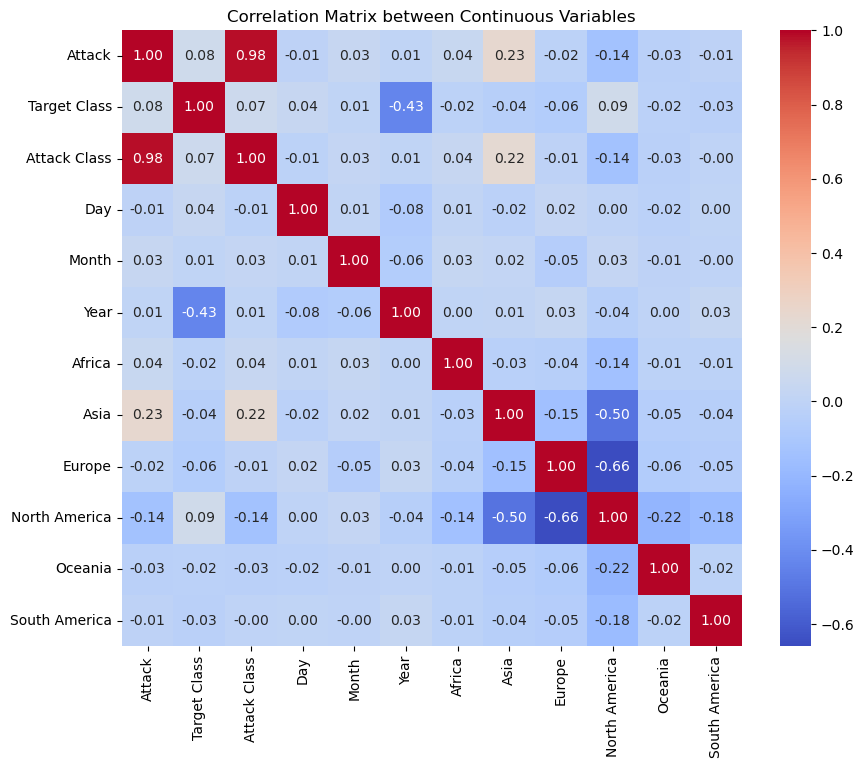

In [107]:
correlation_matrix = df_1.corr()

# Configurar el tamaño de la figura y generar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Título de la gráfica
plt.title('Correlation Matrix between Continuous Variables')
plt.show()